**Menginport Library yang dibutuhkan**

In [1]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
import numpy as np 
from tqdm import tqdm
from sklearn.model_selection import KFold

**Load image dataset**

In [3]:

train_images = []
train_labels = []


for chunk in tqdm(pd.read_csv('emnist-bymerge-train.csv', header=None, chunksize=1000), desc="Reading CSV in chunks"):
    train_labels.extend(chunk[0].values)  
    train_images.extend(chunk.drop(columns=[0]).values)  


train_images = np.array(train_images)
train_labels = np.array(train_labels)




Reading CSV in chunks: 698it [00:42, 16.59it/s]


In [47]:

test_images = []
test_labels = []


for chunk in tqdm(pd.read_csv('emnist-bymerge-test.csv', header=None, chunksize=1000), desc="Reading CSV in chunks"): 
    test_labels.extend(chunk[0].values) 
    test_images.extend(chunk.drop(columns=[0]).values)

test_images = np.array(test_images)
test_labels = np.array(test_labels)


Reading CSV in chunks: 117it [00:06, 17.17it/s]


**Memeriksa dimensi train image** 

In [8]:
train_images[39].shape

(784,)

**Untuk dapat diolah diubah dari 1 menjadi 2 dimensi** 

784 (1 dimensi) = 28*28 (2 dimensi)

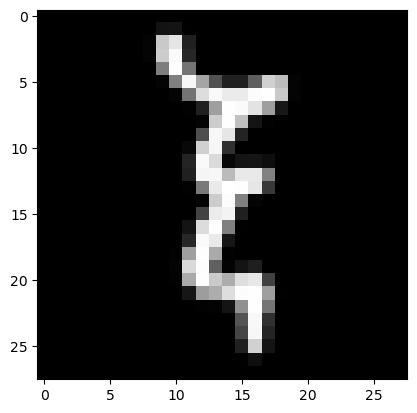

In [12]:
plt.imshow(train_images[39].reshape(28,28), cmap='gray')

**Label Train Images pada index 39**

In [15]:
train_labels[39]

22

**Mencoba Mengambil data HOG pada Train Image index (39)**

In [18]:
feature, hog_img = hog(train_images[39].reshape(28,28), orientations=9, pixels_per_cell=(8,8), cells_per_block=(2,2),
                       visualize=True, block_norm='L2')

<BarContainer object of 144 artists>

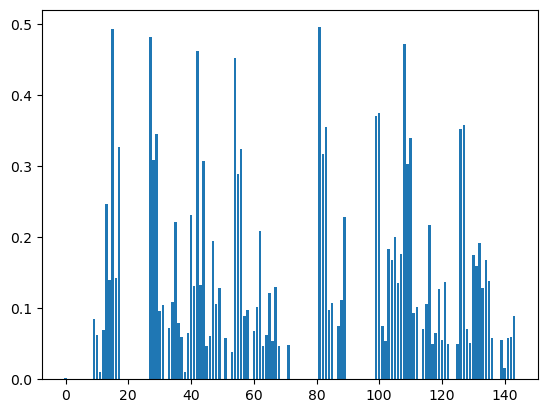

In [20]:
plt.bar(list(range(feature.shape[0])), feature)

**Membuat varibel dataset**

In [23]:
n_dims = feature.shape[0]

In [25]:
n_dims

144

In [27]:
n_samples = train_images.shape[0]

In [29]:
n_samples

697932

In [31]:
X_train, y_train = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [32]:
X_train.shape

(697932, 144)

In [33]:
y_train.shape

(697932,)

**Mengambil HOG pada setiap sample training dan memasukkannya ke variable x_train yang telah dibuat**

In [35]:
for i in tqdm(range(n_samples), desc="Processing data"):
    X_train[i], _ = hog(train_images[i].reshape(28, 28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, block_norm='L2')
    y_train[i] = train_labels[i]

Processing data: 100%|██████████| 697932/697932 [15:54<00:00, 731.56it/s]


**Classification with SVM**

In [40]:
clf = LinearSVC()
clf.fit(X_train, y_train)  

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

**Predict Test Dataset**

In [49]:
n_samples = test_images.shape[0]

In [51]:
n_samples

116323

In [53]:
X_test, y_test = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [55]:
for i in tqdm(range(n_samples), desc="Processing data"):
    X_test[i], _ = hog(test_images[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_test[i] = test_labels[i]

Processing data: 100%|██████████| 116323/116323 [02:33<00:00, 760.03it/s]


**test satu sample**

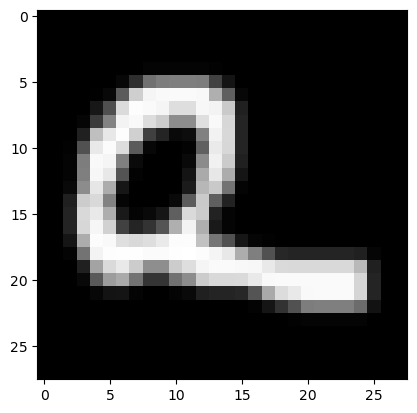

In [57]:
plt.imshow(test_images[1000].reshape(28,28), cmap='gray')

In [59]:
predict_result = clf.predict(X_test[1000].reshape(1, n_dims))

In [61]:
predict_result[0]

9

**Test Confusion Matrix**

In [64]:
from sklearn.metrics import confusion_matrix

In [66]:
y_pred_result = clf.predict(X_test)

In [68]:
conf_mat = confusion_matrix(y_test, y_pred_result)

In [108]:
conf_mat.shape

(47, 47)

In [72]:
from mlxtend.plotting import plot_confusion_matrix

In [118]:
class_names = [
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',  
    'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 
    'U', 'V', 'W', 'X', 'Y', 'Z', 
    'a', 'b','d', 'e', 'f', 'g', 'h', 'n',  'q', 'r', 't'
    
]

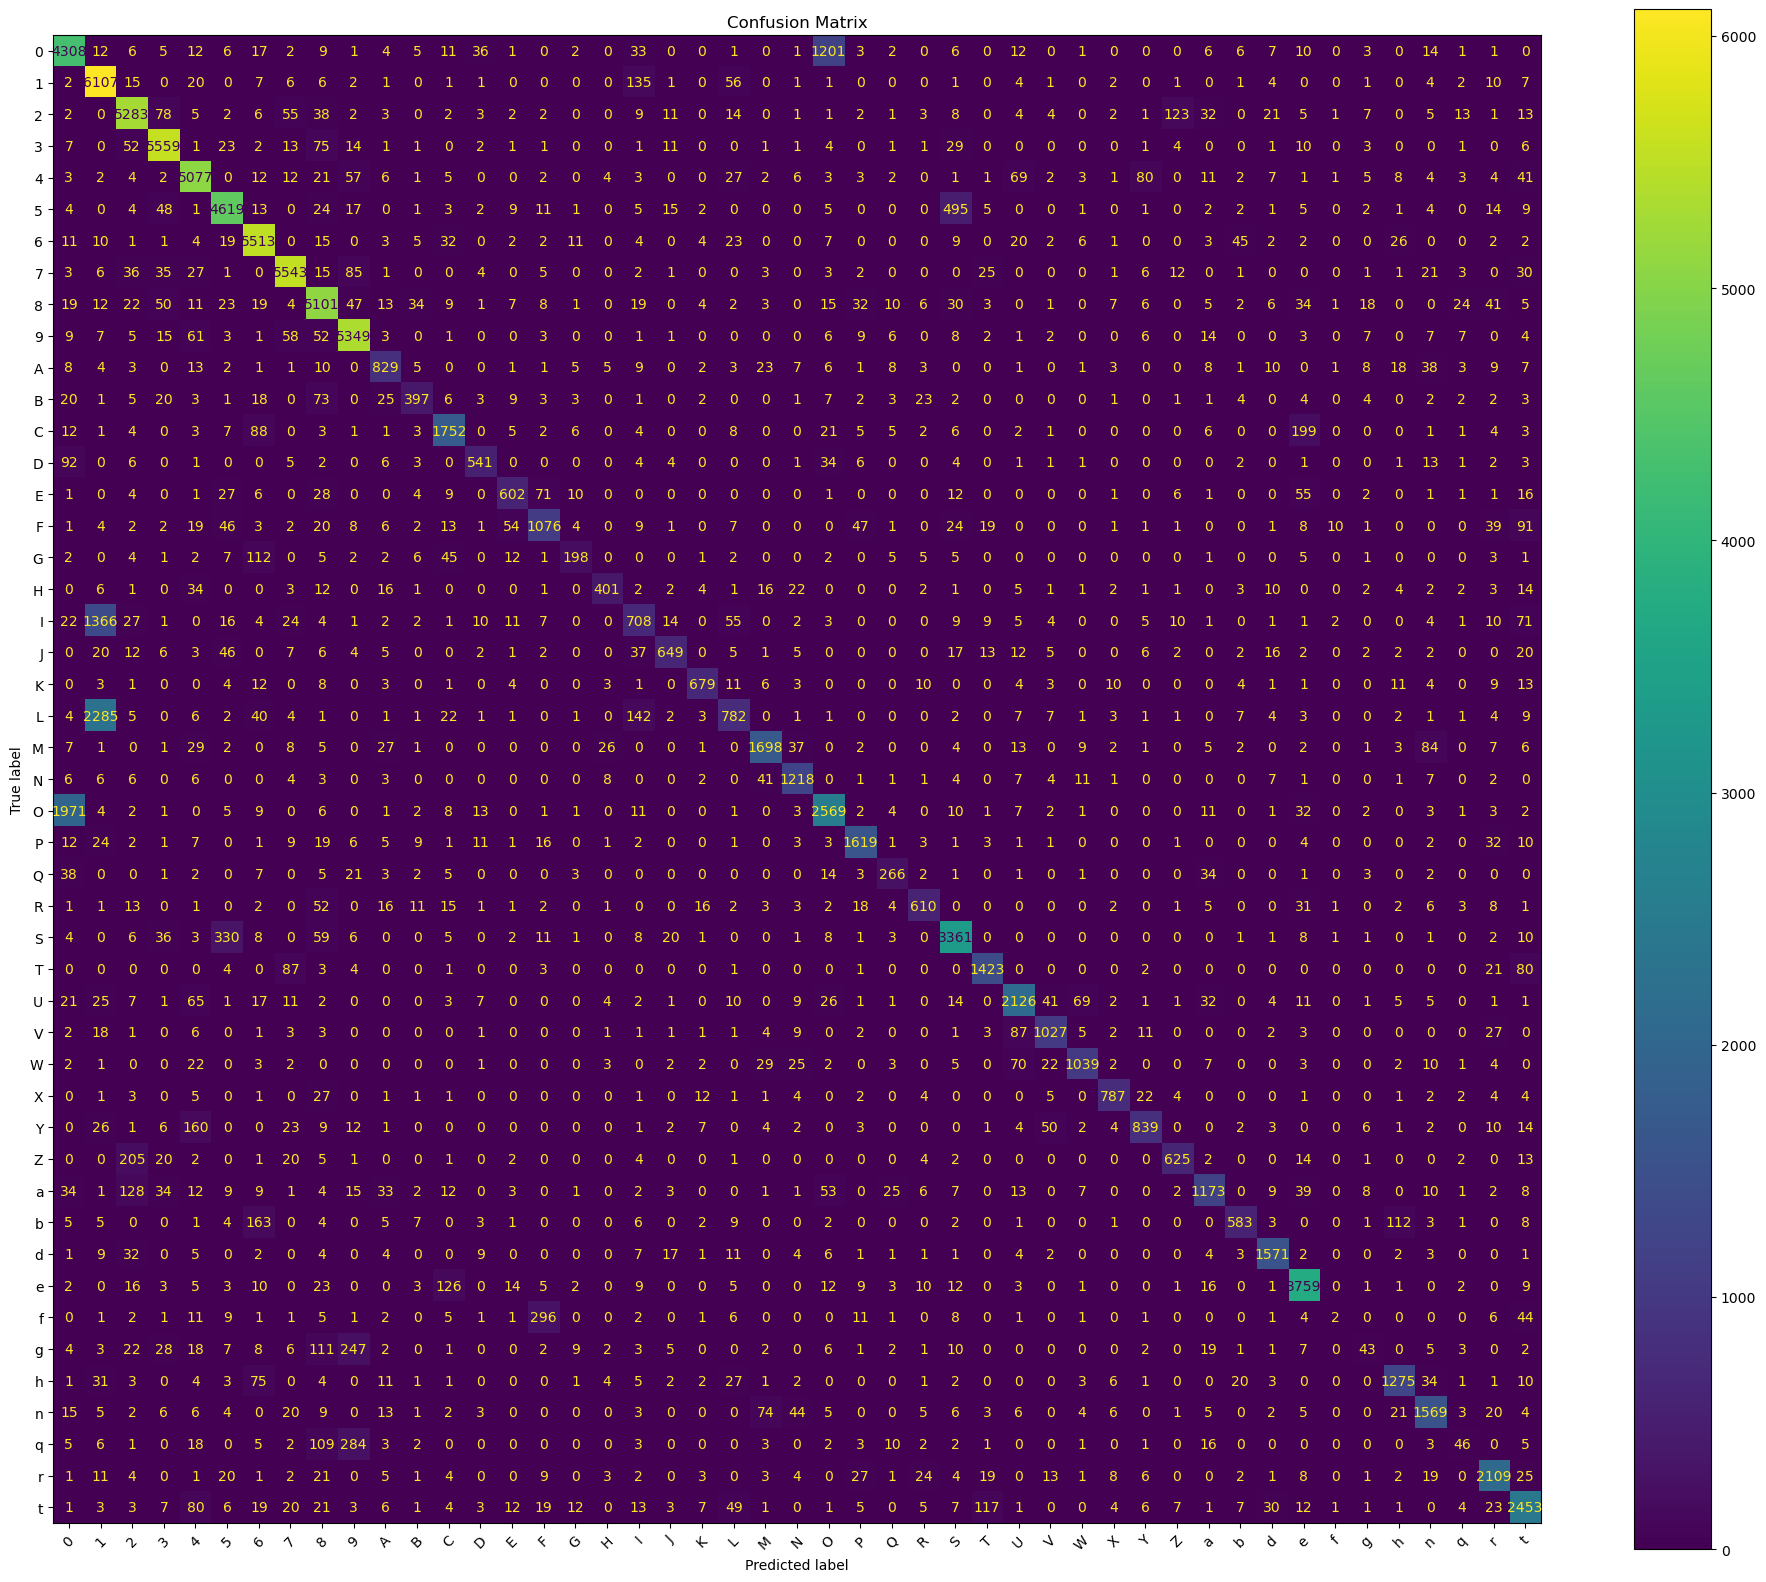

In [120]:
fig, ax = plt.subplots(figsize=(24, 20))
ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=class_names).plot(ax=ax)
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.show()

**Test Precision**

$$\text { Precision }=\frac{T P}{T P+F P}$$

In [124]:
from sklearn.metrics import precision_score

In [126]:
precision = precision_score(y_test, y_pred_result, average=None)

In [128]:
precision

array([0.64655561, 0.60899481, 0.88626069, 0.93131178, 0.87943877,
       0.87796997, 0.8867621 , 0.93034575, 0.84439662, 0.8641357 ,
       0.7733209 , 0.77087379, 0.83111954, 0.81969697, 0.79314888,
       0.68886044, 0.72794118, 0.86051502, 0.58319605, 0.84505208,
       0.89459816, 0.6969697 , 0.884375  , 0.85714286, 0.63715278,
       0.88760965, 0.71891892, 0.83106267, 0.81321074, 0.86347087,
       0.85313002, 0.85512073, 0.88803419, 0.91299304, 0.83234127,
       0.77639752, 0.82547502, 0.82930299, 0.90704388, 0.875     ,
       0.0952381 , 0.31386861, 0.84830339, 0.82709541, 0.33823529,
       0.86399017, 0.79694607])

**Test Recall**

$$\text { Recall }=\frac{T P}{T P+F N}$$

In [132]:
from sklearn.metrics import recall_score

In [134]:
recall = recall_score(y_test, y_pred_result, average=None)

In [136]:
recall

array([0.74986945, 0.95421875, 0.91639202, 0.95400721, 0.9234267 ,
       0.86725498, 0.9526525 , 0.94381066, 0.9020336 , 0.94655813,
       0.78355388, 0.60889571, 0.81261596, 0.73605442, 0.7       ,
       0.70603675, 0.46046512, 0.69618056, 0.29341069, 0.71162281,
       0.83930779, 0.23287671, 0.85584677, 0.9015544 , 0.54776119,
       0.89348786, 0.64096386, 0.73053892, 0.8620159 , 0.87300613,
       0.84098101, 0.83973835, 0.82329635, 0.87736901, 0.70209205,
       0.67567568, 0.70323741, 0.62553648, 0.91978923, 0.92449582,
       0.00469484, 0.07375643, 0.83061889, 0.83814103, 0.08630394,
       0.89175476, 0.82343068])

**Test Akurasi**

In [139]:
from sklearn.metrics import accuracy_score

In [141]:
accuracy = accuracy_score(y_test, y_pred_result)

In [143]:
accuracy

0.8155136989245463

**F1-Score**

$$\text { F1-Score }=\left(\frac{2}{\text { precision }^{-1}+\text { recall }^{-1}}\right)=2 \cdot\left(\frac{\text { precision } \cdot \text { recall }}{\text { precision }+\text { recall }}\right)$$

In [147]:
from sklearn.metrics import f1_score

In [149]:
f1 = f1_score(y_test, y_pred_result, average='macro')

In [151]:
f1

0.7472871629480203